# Smarte und interaktive Kurzskripte (smartiS)
P. Kersten, J. Jeschonowski, L.P. Kamegne-Kamdem, N.B. Neathery und D.M. Weis <br>

Hochschule Hamm-Lippstadt, Marker Allee 76–78, D-59063 Hamm
___

## 8. Das Rennen der Fromen 

In [1]:
#____import____

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.animation as animation

from smartiS import *
from ipywidgets import interact, HBox, VBox, Layout
from IPython.display import Markdown, clear_output, display, HTML
from sympy import symbols
from matplotlib.pyplot import figure

'''
javascript_funktion = {False: "hide()", True: "show()"}
schaltflaeche  = {False: "Quellcode anzeigen", True: "Quellcode verbergen"}


def quellcode_umschalten(state):

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_funktion[state],)
    output        = output_string.format(*output_args)
    display(HTML(output))


def schaltflaeche_aktion(value):

    state = value.new
    quellcode_umschalten(state)
    value.owner.description = schaltflaeche[state]


state = False
quellcode_umschalten(state)

button = widgets.ToggleButton(state, description = schaltflaeche[state])
button.observe(schaltflaeche_aktion, "value")

display(button)
'''

'\njavascript_funktion = {False: "hide()", True: "show()"}\nschaltflaeche  = {False: "Quellcode anzeigen", True: "Quellcode verbergen"}\n\n\ndef quellcode_umschalten(state):\n\n    output_string = "<script>$("div.input").{}</script>"\n    output_args   = (javascript_funktion[state],)\n    output        = output_string.format(*output_args)\n    display(HTML(output))\n\n\ndef schaltflaeche_aktion(value):\n\n    state = value.new\n    quellcode_umschalten(state)\n    value.owner.description = schaltflaeche[state]\n\n\nstate = False\nquellcode_umschalten(state)\n\nbutton = widgets.ToggleButton(state, description = schaltflaeche[state])\nbutton.observe(schaltflaeche_aktion, "value")\n\ndisplay(button)\n'

### Beispiel: Formenrennen
Ein Hohlzylinder, ein Vollzylinder und eine massive Kugel mit den Massen M und den Radien R rollen an einer schiefen Ebene mit der Höhe h und einem Neigungswinkel von $\varphi$ um die wette. (Reibungsverlust und Luftwiderstand wird vernachlässigt)<br>
Wähle zwei Formen, die gegeneinander antretten sollen und schaue wer am Ende am schnellsten ist!

**Knowledge Check(s):**
<ul>
    <li>Winkelgeschwindigkeit und rotationsenergie</li>
    <li>Rechne verschiedene Trägheitsmomente aus und kontrolliere sie!</li>
    <li>Welche Form kommt am schnellsten unten an? Teste es aus!</li>
    <li>Wie müssen die Massen verändert werden, damit alle Formen gleichschnell sind bei gleichem Radius? Und wie ist es vice versa (veränderbare Radien, gleiche Masse)</li>
</ul>


C:\Users\Noel Neathery\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\Users\Noel Neathery\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\Noel Neathery\anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


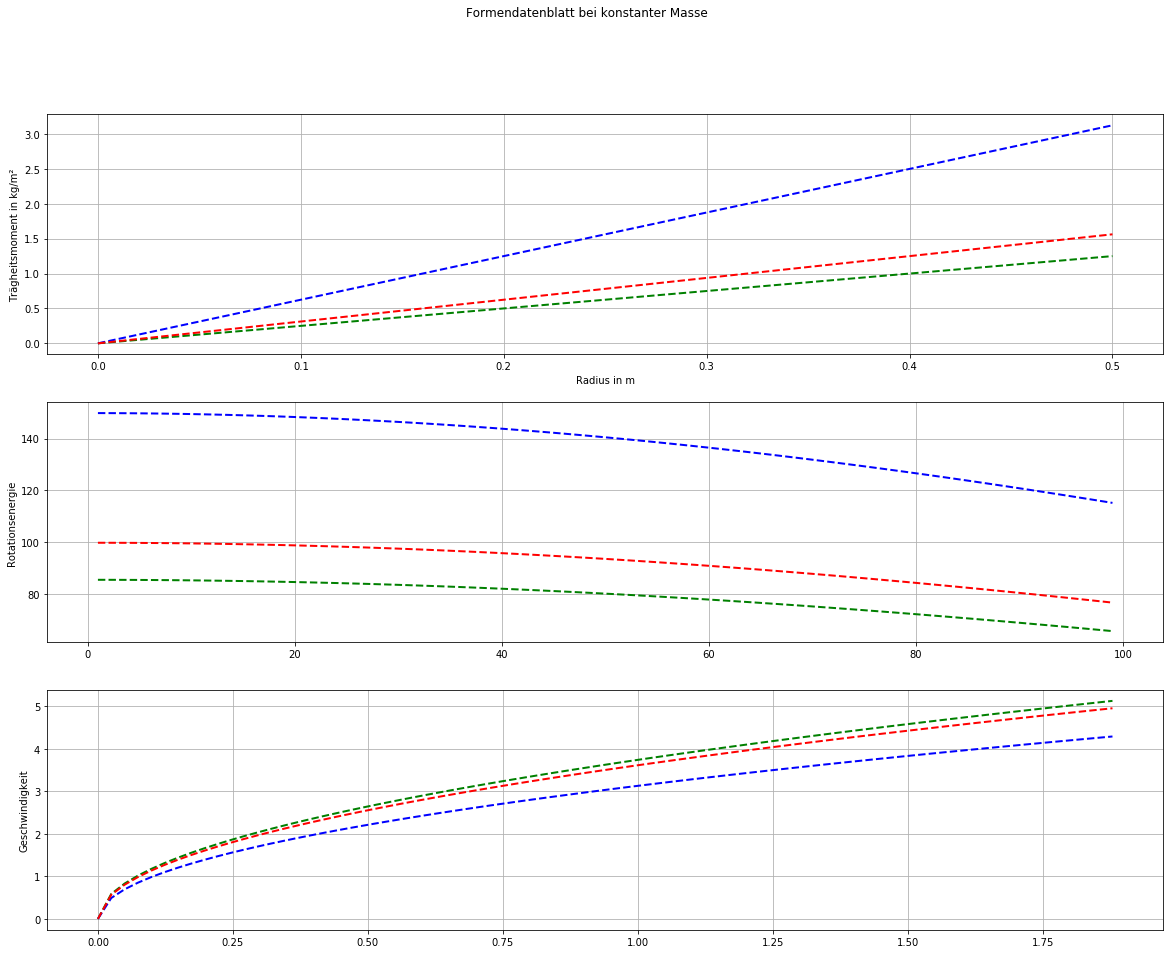

In [2]:
radius = np.linspace(0.0, 0.50, num=100)
masse = 2.5
angle = np.linspace(0,70, num=100)
length = 2

#Kugel
kugel_I = (2/5) * radius * masse**2                                       #moment of inertia
kugel_vel = np.sqrt((10/7)*9.81*(np.sin((angle/360)*2*np.pi) * length))   #velocity
kugel_w = kugel_vel/radius                                                #angular velocity
kugel_E_rot = 1/2 * kugel_I * kugel_w**2                                  #energy of rotation

#Hohlzylinder
hz_I = radius * masse**2                                       #moment of inertia
hz_vel = np.sqrt(9.81*(np.sin((angle/360)*2*np.pi) * length))   #velocity
hz_w = hz_vel/radius                                                #angular velocity
hz_E_rot = 1/2 * hz_I * hz_w**2                                  #energy of rotation

#Vollzylinder
vz_I = (1/2) * radius * masse**2                                       #moment of inertia
vz_vel = np.sqrt((4/3)*9.81*(np.sin((angle/360)*2*np.pi) * length))   #velocity
vz_w = vz_vel/radius                                                #angular velocity
vz_E_rot = 1/2 * vz_I * vz_w**2                                  #energy of rotation

#plot Kugel
fig, axs = plt.subplots(3, figsize=(20, 15))
plt.suptitle('Formendatenblatt bei konstanter Masse')
axs[0].plot(radius, kugel_I, color='green', linestyle='dashed', linewidth=2)
axs[0].grid()
axs[0].set_ylabel('Trägheitsmoment in kg/m²')
axs[0].set_xlabel('Radius in m')

axs[1].plot(kugel_E_rot, color='green', linestyle='dashed', linewidth=2)
axs[1].grid()
axs[1].set_ylabel('Rotationsenergie')

axs[2].plot((np.sin((angle/360)*2*np.pi) * length),kugel_vel, color='green', linestyle='dashed', linewidth=2)
axs[2].grid()
axs[2].set_ylabel('Geschwindigkeit')

#plot Hohlzylinder
axs[0].plot(radius, hz_I, color='blue', linestyle='dashed', linewidth=2)
axs[0].grid()

axs[1].plot(hz_E_rot, color='blue', linestyle='dashed', linewidth=2)
axs[1].grid()

axs[2].plot((np.sin((angle/360)*2*np.pi) * length),hz_vel, color='blue', linestyle='dashed', linewidth=2)
axs[2].grid()

#plot Vollzylinder
axs[0].plot(radius, vz_I, color='red', linestyle='dashed', linewidth=2)
axs[0].grid()

axs[1].plot(vz_E_rot, color='red', linestyle='dashed', linewidth=2)
axs[1].grid()

axs[2].plot((np.sin((angle/360)*2*np.pi) * length), vz_vel, color='red', linestyle='dashed', linewidth=2)
axs[2].grid()

In [17]:
'''
#function, which defines moment of inertia for form
def parameters(form, radius, masse, length, angle):
    if form == 'Kugel':
        I = (2/5) * (radius*10**(-2)) * (masse*10**(-3))**2                 #moment of inertia
        vel = np.sqrt((10/7)*9.81*(np.sin((angle/360)*2*np.pi) * length))   #velocity
        w = vel/radius                                                      #angular velocity
        E_rot = 1/2*I*w**2                                                  #energy of rotation
        print(f'Kugelträgheitsmoment ist {I} kg/m²')
    elif form == 'Vollzylinder':
        I = (1/2) * (radius*10**(-2)) * (masse*10**(-3))**2
        vel = np.sqrt((4/3)*9.81*(np.sin((angle/360)*2*np.pi) * length))
        w = vel/radius
        E_rot = 1/2*I*w**2
        print(f'Vollzylinderträgheitsmoment ist {I} kg/m²')
    else:
        I = (radius*10**(-2)) * (masse*10**(-3))**2
        vel = np.sqrt(9.81*(np.sin((angle/360)*2*np.pi) * length))
        w = vel/radius
        E_rot = 1/2*I*w**2
        print(f'Hohlzylinderträgheitsmoment ist {I} kg/m²')

#let widget interact with function and store value
widgets.interact(parameters, form = drop_down_1, radius = radius_1, masse = masse_1,
                 length = length_1, angle = angle_1)

widgets.interact(parameters, form = drop_down_2, radius = radius_2, masse = masse_2,
                 length = length_2, angle = angle_2)
'''
# animation for forms
class Race(smartiS):
    
    def __init__(self):
        
        # Ebenen definieren
        layers = ["bg",
                  "formen"
                 ]
        lx = 750
        ly = 600

        # smartiS-Klasse initialisieren
        super().__init__(canvases = layers,
                         width    = lx,
                         height   = ly)

        # Elemente erzeugen
       
        #Dropdown menu
        self.drop_down_1 = widgets.Dropdown(options=[('Kugel'),('Vollzylinder'), ('Hohlzylinder')],
                                     value='Kugel',
                                     description='Form 1:')
        self.drop_down_1.observe(self.draw_formen,"value")

        self.drop_down_2 = widgets.Dropdown(options=[('Kugel'), ('Vollzylinder'), ('Hohlzylinder')],
                                     value='Kugel',
                                     description='Form 2:')
        self.drop_down_2.observe(self.draw_formen,"value")

        #interactive sliders for radius and mass from form 1
        self.radius_1 = widgets.FloatSlider(min=0.5,
                                            max=50.0,
                                            step=0.1,
                                            value=10.0,
                                            description='Radius in cm')
        self.radius_1.observe(self.draw_formen,"value")
        
        self.masse_1 = widgets.FloatSlider(min=1.0,
                                           max=5000.0,
                                           step=1.0,
                                           value=50.0,
                                           description='Masse in g')
        self.masse_1.observe(self.draw_formen,"value")

        self.radius_2 = widgets.FloatSlider(min=0.5,
                                            max=50.0,
                                            step=0.1,
                                            value=10.0,
                                            description='Radius in cm')
        self.radius_2.observe(self.draw_formen,"value")
        
        self.masse_2 = widgets.FloatSlider(min=1.0,
                                           max=5000.0,
                                           step=1.0,
                                           value=50.0,
                                           description='Masse in g')
        self.masse_2.observe(self.draw_formen,"value")

        self.length = widgets.IntSlider(min=100,
                                            max=200,
                                            step=1,
                                            value=100,
                                            description='Länge der Rampe/Rennstrecke in Meter')
        self.length.observe(self.draw_background,"value")
        
        self.angle = widgets.IntSlider(min=5,
                                       max=40,
                                       step=1,
                                       value=30,
                                       description='Steigungswinkel')
        self.angle.observe(self.draw_background,"value")

        
        # Elemente darstellen
        display(HBox([
            self.canvas,
            VBox([HBox([], layout=Layout(height="600px")),
                  self.drop_down_1,
                  self.masse_1,
                  self.radius_1,
                  self.drop_down_2,
                  self.masse_2,
                  self.radius_2,
                  self.length,
                  self.angle
                 ])
        ]))
        
        self.draw_background()
        self.draw_formen()
    
    
    
    def draw_background(self,*args):
        
        # Rampe zeichnen
        bg = self["bg"]
        length = self.length.value * 2
        angle = 180 - self.angle.value
        height = np.tan((-angle/180)*np.pi) * length
        
        with hold_canvas(bg):
            
            bg.begin_path()
            bg.clear()
            bg.move_to( 25, 575)
            bg.line_to(25, 575 - height)
            bg.stroke()
            bg.move_to( 25, 575)
            bg.line_to(length, 575)
            bg.stroke
            bg.move_to(25, 575 - height)
            bg.line_to(length, 575)
            bg.stroke()
            
            bg.begin_path()
            bg.move_to(25, 25)
            bg.line_to(25,225)
            bg.line_to(length, 225)
            bg.line_to(length,25)
            bg.line_to(25,25)
            bg.stroke()
    
    
    def draw_formen(self, *args):
        
        #Erste Form zeichnen
        f = self["formen"]
        form1 = self.drop_down_1.value
        form2 = self.drop_down_2.value
        
        m1 = self.masse_1.value
        r1 = self.radius_1.value
        
        m2 = self.masse_2.value
        r2 = self.radius_2.value
        
        #Form1
        if form1 == form1 or form2 == form2:
            f.clear()
        
        if form1 == 'Kugel':
            
            with hold_canvas(f):

                
                f.stroke_arc(75, 75, 45, 0, 2*np.pi)
                f.fill_style = "#0000ff"
                f.fill_arc(75, 75, 45, 0, 2*np.pi)
                
        elif form1 == 'Vollzylinder':
            
            with hold_canvas(f):

                
                f.stroke_rect(30, 30, 90,height=None)
                f.fill_style = "#00ff00"
                f.fill_rect(30, 30, 90,height=None)
                
        elif form1 == 'Hohlzylinder':
            
             with hold_canvas(f):

                
                f.stroke_rect(30, 30, 90,height=None)
                f.fill_style = "#ff0000"
                f.fill_rect(30, 30, 90,height=None)
        
        #Form2
        if form2 == 'Kugel':
            
            with hold_canvas(f):
                
                
                f.stroke_arc(75, 175, 45, 0, 2*np.pi)
                f.fill_style = "#0000ff"
                f.fill_arc(75, 175, 45, 0, 2*np.pi)
                
        elif form2 == 'Vollzylinder':
            
            with hold_canvas(f):

                
                f.stroke_rect(30, 130, 90,height=None)
                f.fill_style = "#00ff00"
                f.fill_rect(30, 130, 90,height=None)
                
        elif form2 == 'Hohlzylinder':
            
             with hold_canvas(f):
                
                
                f.stroke_rect(30, 130, 90,height=None)
                f.fill_style = "#ff0000"
                f.fill_rect(30, 130, 90,height=None)

        
                
            
R = Race()